<a href="https://colab.research.google.com/github/chanu0073/Heart-Disease-Detection-Research-ML-Project/blob/main/Heart_Disease_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv('/content/heart_disease_uci.csv')

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.shape

(920, 16)

In [5]:
data['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [6]:
data['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [7]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Distribution plot of thal

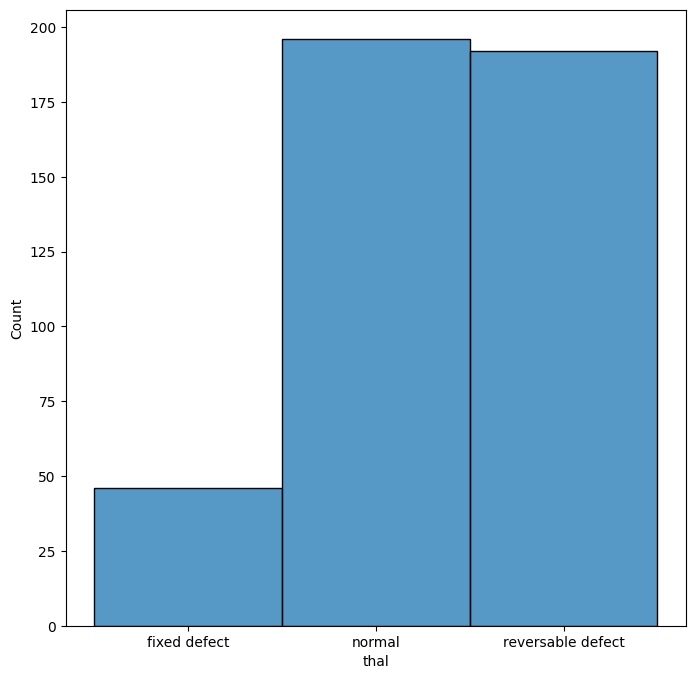

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data['thal'],ax=ax)
plt.show()

In [9]:
data['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [10]:
data['thal'].fillna(data['thal'].mode()[0],inplace=True)

<ipython-input-10-7a3b1d2dbee4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['thal'].fillna(data['thal'].mode()[0],inplace=True)


In [11]:
data['thal'].value_counts()

,count
thal,
normal,682
reversable defect,192
fixed defect,46


In [12]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [13]:
data['ca'].value_counts()

,count
ca,
0.0,181
1.0,67
2.0,41
3.0,20


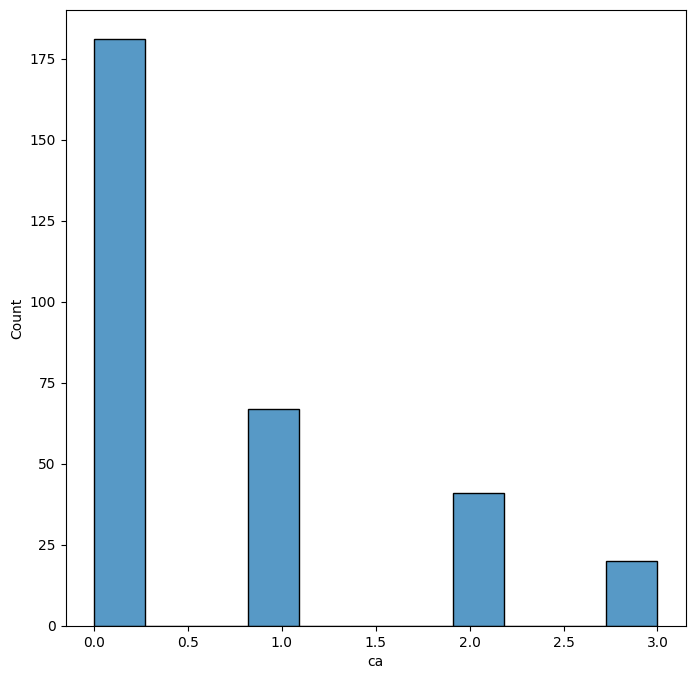

In [14]:
fig,ax = plt.subplots(figsize=(8,8))
sns.histplot(data['ca'],ax=ax)
plt.show()

In [15]:
data['ca'].fillna(data['ca'].mode()[0],inplace=True)

<ipython-input-15-8fa6c9c81012>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ca'].fillna(data['ca'].mode()[0],inplace=True)


In [16]:
data['ca'].value_counts()

,count
ca,
0.0,792
1.0,67
2.0,41
3.0,20


In [17]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [18]:
data['slope'].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


In [19]:
data['slope'].fillna(data['slope'].mode()[0],inplace=True)

<ipython-input-19-9656af72a803>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['slope'].fillna(data['slope'].mode()[0],inplace=True)


In [20]:
data['slope'].value_counts()

,count
slope,
flat,654
upsloping,203
downsloping,63


In [21]:
data['oldpeak'].value_counts()

,count
oldpeak,
0.0,370
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
0.8,15


<ipython-input-22-4a9e3ca294a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['oldpeak'],ax=ax)


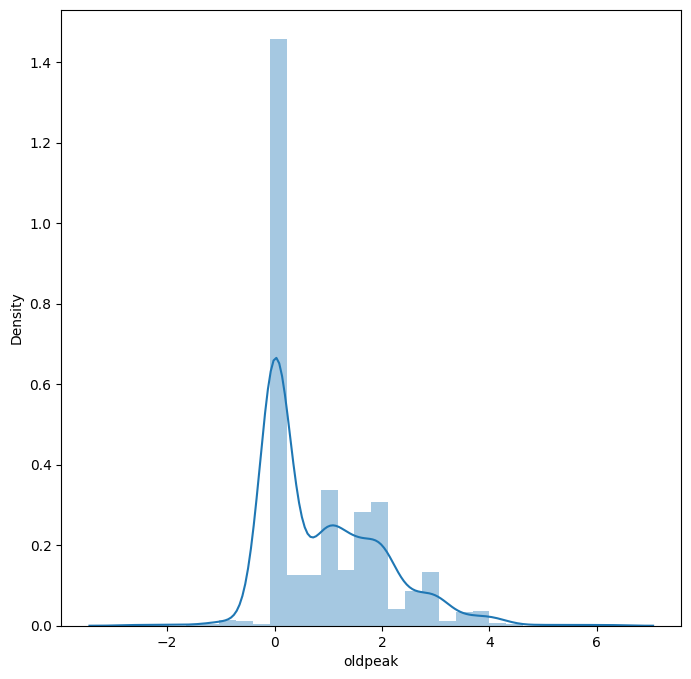

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(data['oldpeak'],ax=ax)
plt.show()

In [23]:
data['oldpeak'] = data['oldpeak'].apply(lambda x: x if x>=0 else 0)

In [24]:
data['oldpeak']

,oldpeak
0,2.3
1,1.5
2,2.6
3,3.5
4,1.4
...,...
915,0.0
916,0.0
917,0.0
918,0.0


In [25]:
data['oldpeak'].value_counts()

,count
oldpeak,
0.0,444
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
0.8,15


In [26]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [27]:
data['oldpeak'].fillna(data['oldpeak'].median,inplace=True)

In [28]:
# Check it's numeric
print(data['oldpeak'].dtype)

float64


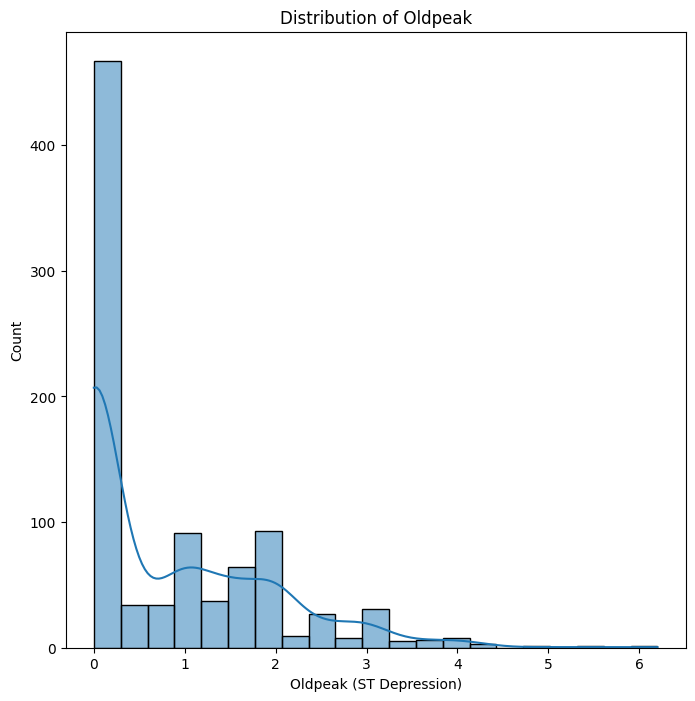

In [29]:
# Plot
plt.figure(figsize=(8, 8))
sns.histplot(data['oldpeak'], kde=True)
plt.title('Distribution of Oldpeak')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Count')
plt.show()

<ipython-input-30-4a9e3ca294a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['oldpeak'],ax=ax)


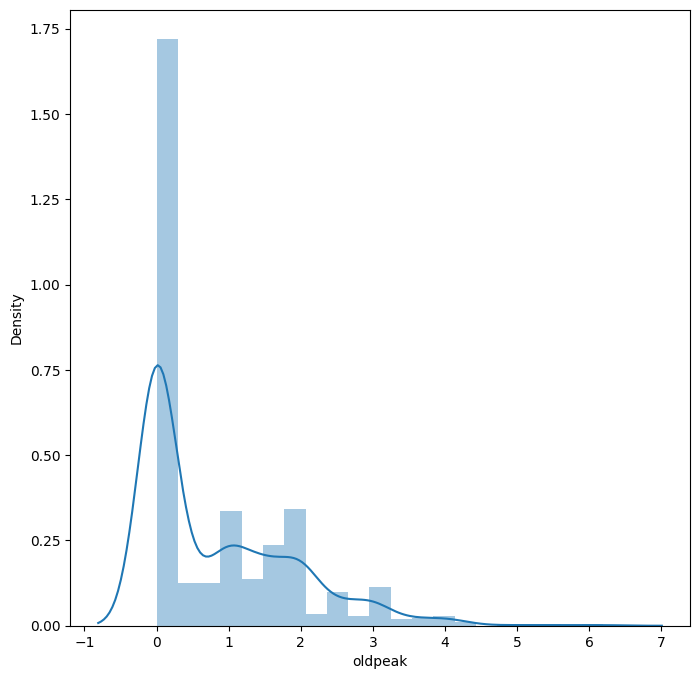

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(data['oldpeak'],ax=ax)
plt.show()

In [31]:
data['exang'].value_counts()

,count
exang,
False,528
True,337


In [32]:
data['exang'].fillna(data['exang'].mode()[0],inplace=True)

<ipython-input-32-616baad38679>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['exang'].fillna(data['exang'].mode()[0],inplace=True)
<ipython-input-32-616baad38679>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['exang'].fillna(data['exang'].mode()[0],inplace=True)


In [33]:
data['exang'].value_counts()

,count
exang,
False,583
True,337


In [34]:
le =  LabelEncoder()

In [35]:
data['exang'] = le.fit_transform(data['exang'])

In [36]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [37]:
data['exang'].value_counts()

,count
exang,
0,583
1,337


In [38]:
data['restecg'].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


In [39]:
data['thalch'].value_counts()

,count
thalch,
150.0,43
140.0,41
120.0,35
130.0,30
160.0,26
...,...
63.0,1
67.0,1
107.0,1


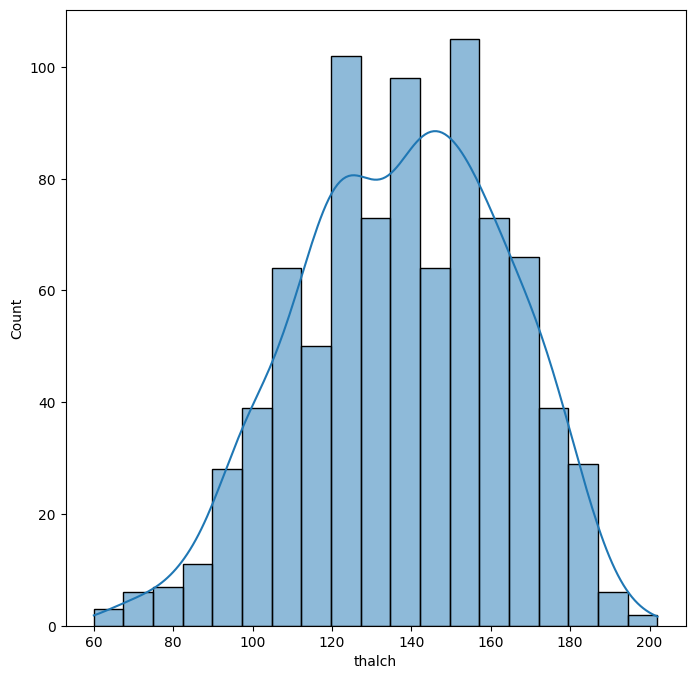

In [40]:
plt.figure(figsize=(8,8))
sns.histplot(data['thalch'],kde=True)
plt.show()

In [41]:
data['thalch'].fillna(data['thalch'].mean(),inplace=True)

<ipython-input-41-02f87ef8e282>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['thalch'].fillna(data['thalch'].mean(),inplace=True)


In [42]:
data['thalch'].value_counts()

,count
thalch,
137.545665,55
150.000000,43
140.000000,41
120.000000,35
130.000000,30
...,...
63.000000,1
67.000000,1
107.000000,1


In [43]:
data['restecg'].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


In [44]:
data['restecg'].fillna(data['restecg'].mode()[0],inplace=True)

<ipython-input-44-42b2cf27e808>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['restecg'].fillna(data['restecg'].mode()[0],inplace=True)


In [45]:
data['restecg'].value_counts()

,count
restecg,
normal,553
lv hypertrophy,188
st-t abnormality,179


In [46]:
restecg_map = {
    'normal':0,
    'st-t abnormality':1,
    'lv hypertrophy':2
}
data['restecg'] = data['restecg'].map(restecg_map)

In [47]:
data['restecg'].value_counts()

,count
restecg,
0,553
2,188
1,179


In [48]:
data['fbs'].value_counts()

,count
fbs,
False,692
True,138


In [49]:
data['fbs'].fillna(data['fbs'].mode()[0],inplace=True)

<ipython-input-49-6cd291b08620>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fbs'].fillna(data['fbs'].mode()[0],inplace=True)
<ipython-input-49-6cd291b08620>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['fbs'].fillna(data['fbs'].mode()[0],inplace=True)


In [50]:
data['fbs'] = LabelEncoder().fit_transform(data['fbs'])

In [51]:
data['fbs'].value_counts()

,count
fbs,
0,782
1,138


In [52]:
data['chol'].value_counts()

,count
chol,
0.0,172
220.0,10
254.0,10
204.0,9
219.0,9
...,...
165.0,1
337.0,1
333.0,1


<ipython-input-53-1c79c8b6edde>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['chol'],ax=ax)


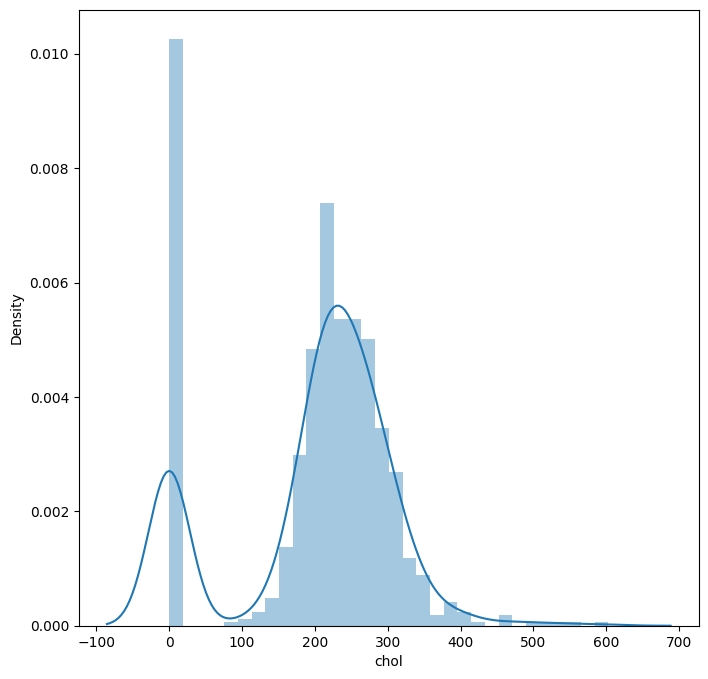

In [53]:
fig,ax = plt.subplots(figsize=(8,8))
sns.distplot(data['chol'],ax=ax)
plt.show()

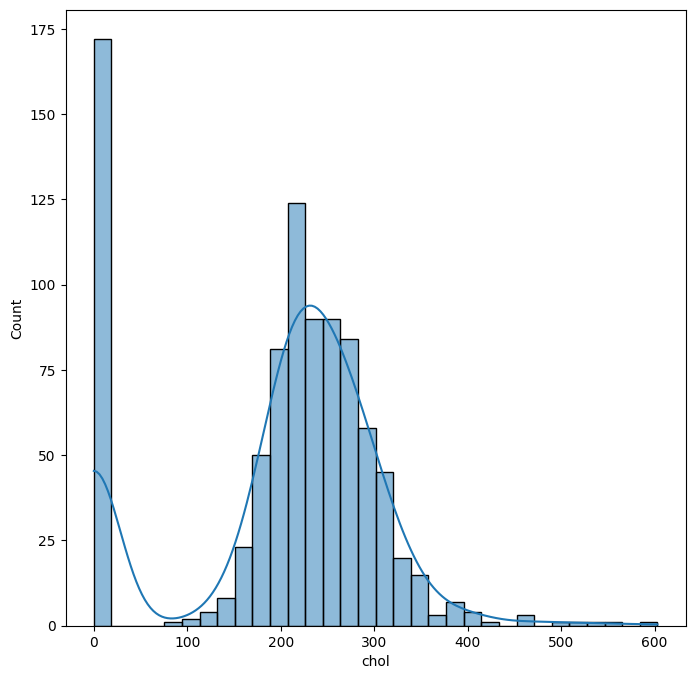

In [54]:
plt.figure(figsize=(8,8))
sns.histplot(data['chol'],kde=True)
plt.show()

In [55]:
data['chol'] = data['chol'].replace(0,np.nan)

In [56]:
data['chol'].fillna(data['chol'].median(),inplace=True)

<ipython-input-56-2c196366649c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['chol'].fillna(data['chol'].median(),inplace=True)


In [57]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,0
fbs,0
restecg,0
thalch,0


In [58]:
data['trestbps'].value_counts()

,count
trestbps,
120.0,131
130.0,115
140.0,102
110.0,59
150.0,56
...,...
92.0,1
185.0,1
0.0,1


<ipython-input-59-daff380baef6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['trestbps'])


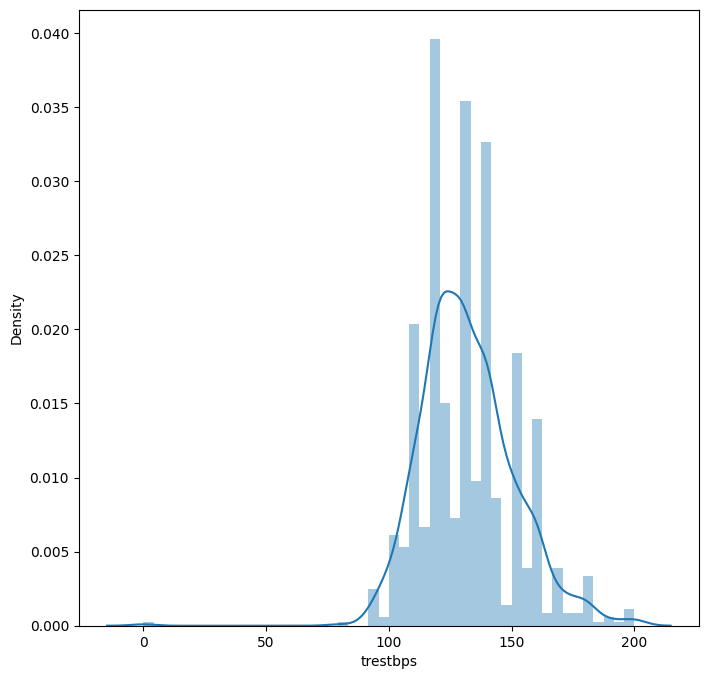

In [59]:
plt.figure(figsize=(8,8))
sns.distplot(data['trestbps'])
plt.show()

In [60]:
data['trestbps'] =  data['trestbps'].replace(0,np.nan)

In [61]:
data['trestbps'].fillna(data['trestbps'].mean(),inplace=True)

<ipython-input-61-542b8fd4a0b4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['trestbps'].fillna(data['trestbps'].mean(),inplace=True)


In [62]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [63]:
data.shape

(920, 16)

In [64]:
data['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [65]:
data['num'] = data['num'].apply(lambda x: 0 if x==0 else 1)

In [66]:
data['num'].value_counts()

,count
num,
1,509
0,411


In [67]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1,2,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,2,108.0,1,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0,2,129.0,1,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0,0,187.0,0,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0,2,172.0,0,1.4,upsloping,0.0,normal,0


Label Encoding

Encoding for thal attribute

In [68]:
data['thal'].value_counts()  ## thal has nominla data, so we should encode it using One Hot Encoding

,count
thal,
normal,682
reversable defect,192
fixed defect,46


In [69]:
thal_dummies = pd.get_dummies(data['thal'],prefix='thal')
data = pd.concat([data,thal_dummies],axis=1)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1,2,150.0,0,2.3,downsloping,0.0,fixed defect,0,True,False,False
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,2,108.0,1,1.5,flat,3.0,normal,1,False,True,False
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0,2,129.0,1,2.6,flat,2.0,reversable defect,1,False,False,True
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0,0,187.0,0,3.5,downsloping,0.0,normal,0,False,True,False
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0,2,172.0,0,1.4,upsloping,0.0,normal,0,False,True,False


In [70]:
data.drop(columns=['thal','thal_reversable defect'],axis=1,inplace=True)

In [71]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,thal_fixed defect,thal_normal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1,2,150.0,0,2.3,downsloping,0.0,0,True,False
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,2,108.0,1,1.5,flat,3.0,1,False,True
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0,2,129.0,1,2.6,flat,2.0,1,False,False
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0,0,187.0,0,3.5,downsloping,0.0,0,False,True
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0,2,172.0,0,1.4,upsloping,0.0,0,False,True


In [72]:
data['thal_fixed defect'] = LabelEncoder().fit_transform(data['thal_fixed defect'])
data['thal_normal'] = LabelEncoder().fit_transform(data['thal_normal'])
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,num,thal_fixed defect,thal_normal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1,2,150.0,0,2.3,downsloping,0.0,0,1,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,2,108.0,1,1.5,flat,3.0,1,0,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0,2,129.0,1,2.6,flat,2.0,1,0,0
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0,0,187.0,0,3.5,downsloping,0.0,0,0,1
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0,2,172.0,0,1.4,upsloping,0.0,0,0,1


Encoding for slope attribute

In [73]:
data['slope'].value_counts()

,count
slope,
flat,654
upsloping,203
downsloping,63


In [74]:
slope_dummies = pd.get_dummies(data['slope'],prefix='slope',drop_first=True)
data = pd.concat([data,slope_dummies],axis=1)
data.drop(['slope'],axis=1,inplace=True)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num,thal_fixed defect,thal_normal,slope_flat,slope_upsloping
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1,2,150.0,0,2.3,0.0,0,1,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,2,108.0,1,1.5,3.0,1,0,1,True,False
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0,2,129.0,1,2.6,2.0,1,0,0,True,False
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0,0,187.0,0,3.5,0.0,0,0,1,False,False
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0,2,172.0,0,1.4,0.0,0,0,1,False,True


In [75]:
data['slope_flat'] = LabelEncoder().fit_transform(data['slope_flat'])
data['slope_upsloping'] = LabelEncoder().fit_transform(data['slope_upsloping'])
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num,thal_fixed defect,thal_normal,slope_flat,slope_upsloping
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1,2,150.0,0,2.3,0.0,0,1,0,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,2,108.0,1,1.5,3.0,1,0,1,1,0
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0,2,129.0,1,2.6,2.0,1,0,0,1,0
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0,0,187.0,0,3.5,0.0,0,0,1,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0,2,172.0,0,1.4,0.0,0,0,1,0,1


Encoding for cp

In [76]:
data['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [77]:
cp_dummies = pd.get_dummies(data['cp'],prefix='cp',drop_first=True)
data = pd.concat([data,cp_dummies],axis=1)
data.drop(['cp'],axis=1,inplace=True)
data.head()

,id,age,sex,dataset,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num,thal_fixed defect,thal_normal,slope_flat,slope_upsloping,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,Male,Cleveland,145.0,233.0,1,2,150.0,0,2.3,0.0,0,1,0,0,0,False,False,True
1,2,67,Male,Cleveland,160.0,286.0,0,2,108.0,1,1.5,3.0,1,0,1,1,0,False,False,False
2,3,67,Male,Cleveland,120.0,229.0,0,2,129.0,1,2.6,2.0,1,0,0,1,0,False,False,False
3,4,37,Male,Cleveland,130.0,250.0,0,0,187.0,0,3.5,0.0,0,0,1,0,0,False,True,False
4,5,41,Female,Cleveland,130.0,204.0,0,2,172.0,0,1.4,0.0,0,0,1,0,1,True,False,False


In [78]:
data['cp_typical angina'] = LabelEncoder().fit_transform(data['cp_typical angina'])
data['cp_non-anginal'] = LabelEncoder().fit_transform(data['cp_non-anginal'])
data['cp_atypical angina'] = LabelEncoder().fit_transform(data['cp_atypical angina'])
data.head()

,id,age,sex,dataset,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,num,thal_fixed defect,thal_normal,slope_flat,slope_upsloping,cp_atypical angina,cp_non-anginal,cp_typical angina
0,1,63,Male,Cleveland,145.0,233.0,1,2,150.0,0,2.3,0.0,0,1,0,0,0,0,0,1
1,2,67,Male,Cleveland,160.0,286.0,0,2,108.0,1,1.5,3.0,1,0,1,1,0,0,0,0
2,3,67,Male,Cleveland,120.0,229.0,0,2,129.0,1,2.6,2.0,1,0,0,1,0,0,0,0
3,4,37,Male,Cleveland,130.0,250.0,0,0,187.0,0,3.5,0.0,0,0,1,0,0,0,1,0
4,5,41,Female,Cleveland,130.0,204.0,0,2,172.0,0,1.4,0.0,0,0,1,0,1,1,0,0


Encoding for dataset attribute

In [79]:
data['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [80]:
dataset_dummies = pd.get_dummies(data['dataset'],prefix='dataset',drop_first=True)
data = pd.concat([data,dataset_dummies],axis=1)
data.drop(['dataset'],axis=1,inplace=True)
data.head()

,id,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,...,thal_fixed defect,thal_normal,slope_flat,slope_upsloping,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1,63,Male,145.0,233.0,1,2,150.0,0,2.3,...,1,0,0,0,0,0,1,False,False,False
1,2,67,Male,160.0,286.0,0,2,108.0,1,1.5,...,0,1,1,0,0,0,0,False,False,False
2,3,67,Male,120.0,229.0,0,2,129.0,1,2.6,...,0,0,1,0,0,0,0,False,False,False
3,4,37,Male,130.0,250.0,0,0,187.0,0,3.5,...,0,1,0,0,0,1,0,False,False,False
4,5,41,Female,130.0,204.0,0,2,172.0,0,1.4,...,0,1,0,1,1,0,0,False,False,False


In [81]:
data['dataset_Hungary'] = LabelEncoder().fit_transform(data['dataset_Hungary'])
data['dataset_Switzerland'] = LabelEncoder().fit_transform(data['dataset_Switzerland'])
data['dataset_VA Long Beach'] = LabelEncoder().fit_transform(data['dataset_VA Long Beach'])
data.head()

,id,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,...,thal_fixed defect,thal_normal,slope_flat,slope_upsloping,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1,63,Male,145.0,233.0,1,2,150.0,0,2.3,...,1,0,0,0,0,0,1,0,0,0
1,2,67,Male,160.0,286.0,0,2,108.0,1,1.5,...,0,1,1,0,0,0,0,0,0,0
2,3,67,Male,120.0,229.0,0,2,129.0,1,2.6,...,0,0,1,0,0,0,0,0,0,0
3,4,37,Male,130.0,250.0,0,0,187.0,0,3.5,...,0,1,0,0,0,1,0,0,0,0
4,5,41,Female,130.0,204.0,0,2,172.0,0,1.4,...,0,1,0,1,1,0,0,0,0,0


Encoding for Sex attribute

In [82]:
data['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [83]:
data['sex'] = LabelEncoder().fit_transform(data['sex'])
data.head()

,id,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,...,thal_fixed defect,thal_normal,slope_flat,slope_upsloping,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1,63,1,145.0,233.0,1,2,150.0,0,2.3,...,1,0,0,0,0,0,1,0,0,0
1,2,67,1,160.0,286.0,0,2,108.0,1,1.5,...,0,1,1,0,0,0,0,0,0,0
2,3,67,1,120.0,229.0,0,2,129.0,1,2.6,...,0,0,1,0,0,0,0,0,0,0
3,4,37,1,130.0,250.0,0,0,187.0,0,3.5,...,0,1,0,0,0,1,0,0,0,0
4,5,41,0,130.0,204.0,0,2,172.0,0,1.4,...,0,1,0,1,1,0,0,0,0,0


In [84]:
print(data.head())

   id  age  sex  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  ...  \
0   1   63    1     145.0  233.0    1        2   150.0      0      2.3  ...   
1   2   67    1     160.0  286.0    0        2   108.0      1      1.5  ...   
2   3   67    1     120.0  229.0    0        2   129.0      1      2.6  ...   
3   4   37    1     130.0  250.0    0        0   187.0      0      3.5  ...   
4   5   41    0     130.0  204.0    0        2   172.0      0      1.4  ...   

   thal_fixed defect  thal_normal  slope_flat  slope_upsloping  \
0                  1            0           0                0   
1                  0            1           1                0   
2                  0            0           1                0   
3                  0            1           0                0   
4                  0            1           0                1   

   cp_atypical angina  cp_non-anginal  cp_typical angina  dataset_Hungary  \
0                   0               0              

In [85]:
data.shape

(920, 22)

Standardizing the data

In [86]:
data.values.std()

np.float64(123.76729813146245)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
numerical_cols = ['age','trestbps','chol','thalch','oldpeak','ca']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [89]:
data.head()

,id,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,...,thal_fixed defect,thal_normal,slope_flat,slope_upsloping,cp_atypical angina,cp_non-anginal,cp_typical angina,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1,1.007386,1,0.709836,-0.236157,1,2,0.495698,0,1.389152,...,1,0,0,0,0,0,1,0,0,0
1,2,1.432034,1,1.547304,0.787855,0,2,-1.175955,1,0.631414,...,0,1,1,0,0,0,0,0,0,0
2,3,1.432034,1,-0.685945,-0.313441,0,2,-0.340128,1,1.673304,...,0,0,1,0,0,0,0,0,0,0
3,4,-1.752828,1,-0.127633,0.092300,0,0,1.968345,0,2.525759,...,0,1,0,0,0,1,0,0,0,0
4,5,-1.328180,0,-0.127633,-0.796466,0,2,1.371326,0,0.536697,...,0,1,0,1,1,0,0,0,0,0


In [90]:
data[numerical_cols].agg(['mean', 'std'])

,age,trestbps,chol,thalch,oldpeak,ca
mean,6.178632e-17,-4.479509e-16,-1.660507e-16,2.162521e-16,-5.406303e-17,6.178632e-17
std,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00


Splitting the features and target of the data

In [91]:
X = data.drop(['num'],axis=1)
y = data['num']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
logistic = LogisticRegression(max_iter=1000)

In [96]:
logistic.fit(X_train, y_train)
y_preds = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8532608695652174


[[63 12]
 [15 94]]


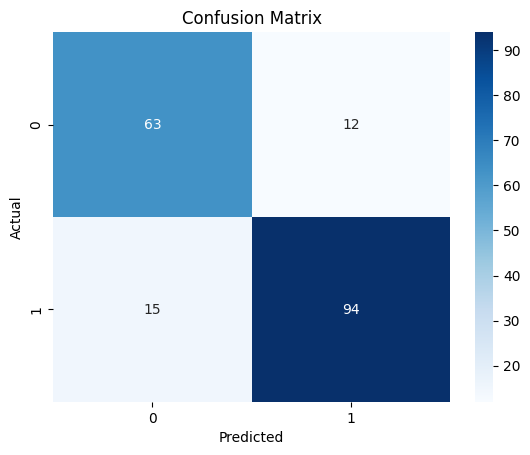

In [97]:
cm = confusion_matrix(y_test, y_preds)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [98]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        75
           1       0.89      0.86      0.87       109

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [99]:
logistic = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)
logistic.fit(X_train, y_train)
y_preds = logistic.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_preds))
print("Classification Report:\n", classification_report(y_test, y_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

Accuracy: 0.8586956521739131
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        75
           1       0.89      0.87      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184

Confusion Matrix:
 [[63 12]
 [14 95]]


Building XG Boost Classifier Model

In [106]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [108]:
params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=50, scoring='accuracy',
                                   cv=5, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score from CV:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.6, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.6}
Best score from CV: 0.8777164920022062


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:31:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [110]:
best_xgb = random_search.best_estimator_
xgb_preds = best_xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))

Accuracy: 0.8913043478260869
Confusion Matrix:
 [[65 10]
 [10 99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        75
           1       0.91      0.91      0.91       109

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

